In [1]:
import mne
import numpy as np

In [2]:
raw = mne.io.read_raw("files/sess02_subj04_EEG_Artifact-EEG_Artifact-raw.fif", preload=True)
raw.filter(1, 40, fir_design='firwin')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,65 points
Good channels,"62 EEG, 4 EMG"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [3]:
events, ev_id = mne.events_from_annotations(raw, event_id={'eyemovement_blinking': 1}, verbose=None)

In [4]:
def update(events):
    t = 2
    initial = events[-1][0]

    new_initial = int(initial + t*256)

    events = np.append(events, [[new_initial, 0, 1]], axis=0)

    return events

In [5]:
for i in range(6):
    events = update(events)

In [6]:
events

array([[27547,     0,     1],
       [28059,     0,     1],
       [28571,     0,     1],
       [29083,     0,     1],
       [29595,     0,     1],
       [30107,     0,     1],
       [30619,     0,     1]])

In [7]:
event_id = {'eyemovement_blinking': 1}
tmin = 0
tmax = 2

In [8]:
noisy_avg = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                           picks="eeg", baseline=None, preload=True,
                           verbose=False).average()
noisy_avg

Condition,eyemovement_blinking
Data kind,average
Timepoints,2001 samples
Channels,62 channels
Number of averaged epochs,7
Time range (secs),0.0 – 2.0
Baseline (secs),off


In [9]:
from utils.processing import Processing

In [16]:
get = Processing(raw=raw, mode="ASR")

In [17]:
clean_raw = get.reconstructed

# Create an average using the cleaned data
clean_avg = mne.Epochs(clean_raw, events, event_id, tmin, tmax, proj=False,
                           picks="eeg", baseline=None, preload=True,
                           verbose=False).average()
     

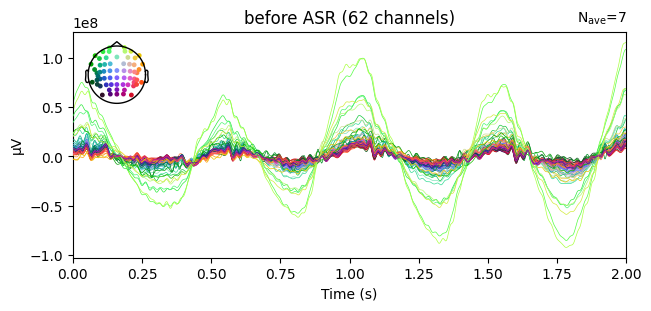

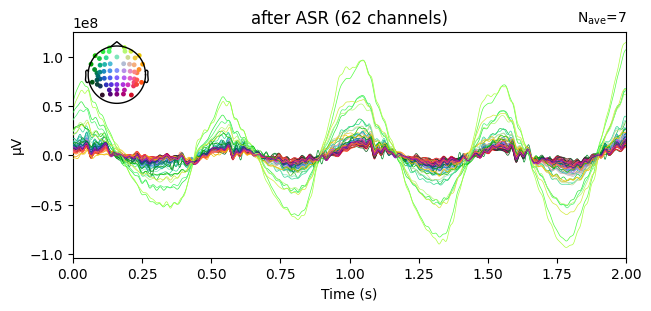

In [18]:
noisy_avg.plot(spatial_colors=True,
               titles="before ASR")

clean_avg.plot(spatial_colors=True,
               titles="after ASR");